The FPC is defined on the range from 0 to 1, with 1 being best. It is a metric which tells us how cleanly our data is described by a certain model. Next we will cluster our set of data - which we know has three clusters - several times, with between 2 and 10 clusters.

In [1]:
import numpy as np, pandas as pd, os
import matplotlib
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
import skfuzzy as fuzz
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [2]:
col_names = ["SepalLengthCm",  "SepalWidthCm", "PetalLengthCm","PetalWidthCm", "Class"]
data = pd.read_csv('iris.data', names = col_names)

x = data.iloc[:,0:4]
y = data.iloc[:,-1]

In [3]:
x.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

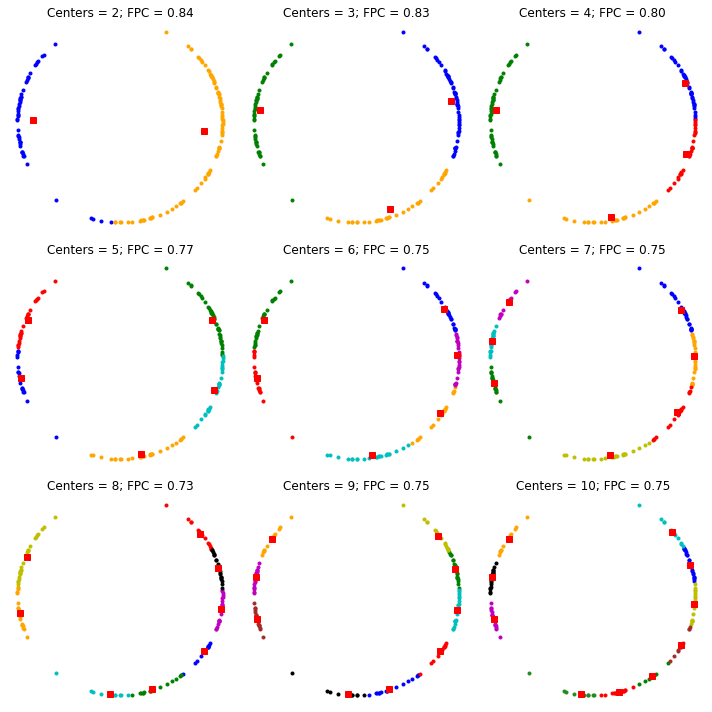

In [4]:
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
lsa = TruncatedSVD(2, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(X_std)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
a= pd.DataFrame(dtm_lsa, columns = ["component_1","component_2"])
a['targets']=y
fig1, axes1 = plt.subplots(3, 3, figsize=(10, 10))
alldata = np.vstack((a['component_1'], a['component_2']))
fpcs = []

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen'] 

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later plots
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(a['component_1'][cluster_membership == j],
                a['component_2'][cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()
fig1.savefig('iris_dataset.png')

Text(0, 0.5, 'Fuzzy partition coefficient')

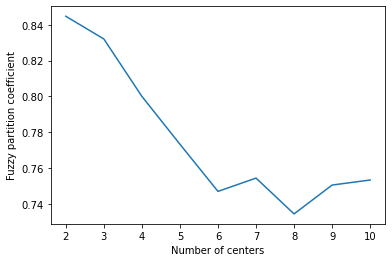

In [5]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")